In [3]:
import pandas as pd
import numpy as np
import seaborn as  sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans

In [4]:
data=pd.read_csv('/content/customer_support_tickets.csv')

In [5]:
data.head(10)

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
5,6,Rebecca Fleming,sheenasmith@example.com,53,Male,Microsoft Office,2020-07-28,Cancellation request,Payment issue,I'm facing a problem with my {product_purchase...,Open,NaN,Low,Social media,NaN,NaN,NaN
6,7,Jacqueline Wright,donaldkeith@example.org,24,Other,Microsoft Surface,2020-02-23,Product inquiry,Refund request,I'm unable to access my {product_purchased} ac...,Open,NaN,Critical,Social media,NaN,NaN,NaN
7,8,Denise Lee,joelwilliams@example.com,23,Male,Philips Hue Lights,2020-08-09,Refund request,Battery life,I'm having an issue with the {product_purchase...,Open,NaN,Critical,Social media,NaN,NaN,NaN
8,9,Nicolas Wilson,joshua24@example.com,60,Other,Fitbit Versa Smartwatch,2020-07-16,Technical issue,Installation support,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Low,Social media,2023-06-01 10:32:47,NaN,NaN
9,10,William Dawson,clopez@example.com,27,Male,Dyson Vacuum Cleaner,2020-03-06,Refund request,Payment issue,My {product_purchased} is making strange noise...,Pending Customer Response,NaN,Critical,Phone,2023-06-01 09:25:48,NaN,NaN


In [6]:
data.shape

(8469, 17)

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [8]:
print(data.describe())

         Ticket ID  Customer Age  Customer Satisfaction Rating
count  8469.000000   8469.000000                   2769.000000
mean   4235.000000     44.026804                      2.991333
std    2444.934048     15.296112                      1.407016
min       1.000000     18.000000                      1.000000
25%    2118.000000     31.000000                      2.000000
50%    4235.000000     44.000000                      3.000000
75%    6352.000000     57.000000                      4.000000
max    8469.000000     70.000000                      5.000000


In [9]:
print(data.columns)

Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')


In [10]:
data['Date of Purchase'] = pd.to_datetime(data['Date of Purchase'])
data['YearMonth'] = data['Date of Purchase'].dt.to_period('M')
ticket_trends = data.groupby('YearMonth').size()
print("Ticket Trends")
print(ticket_trends)

Ticket Trends
YearMonth
2020-01    377
2020-02    376
2020-03    324
2020-04    354
2020-05    322
2020-06    358
2020-07    366
2020-08    327
2020-09    369
2020-10    373
2020-11    340
2020-12    350
2021-01    359
2021-02    339
2021-03    348
2021-04    364
2021-05    379
2021-06    320
2021-07    361
2021-08    364
2021-09    327
2021-10    362
2021-11    364
2021-12    346
Freq: M, dtype: int64


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Ticket ID                     8469 non-null   int64         
 1   Customer Name                 8469 non-null   object        
 2   Customer Email                8469 non-null   object        
 3   Customer Age                  8469 non-null   int64         
 4   Customer Gender               8469 non-null   object        
 5   Product Purchased             8469 non-null   object        
 6   Date of Purchase              8469 non-null   datetime64[ns]
 7   Ticket Type                   8469 non-null   object        
 8   Ticket Subject                8469 non-null   object        
 9   Ticket Description            8469 non-null   object        
 10  Ticket Status                 8469 non-null   object        
 11  Resolution                    

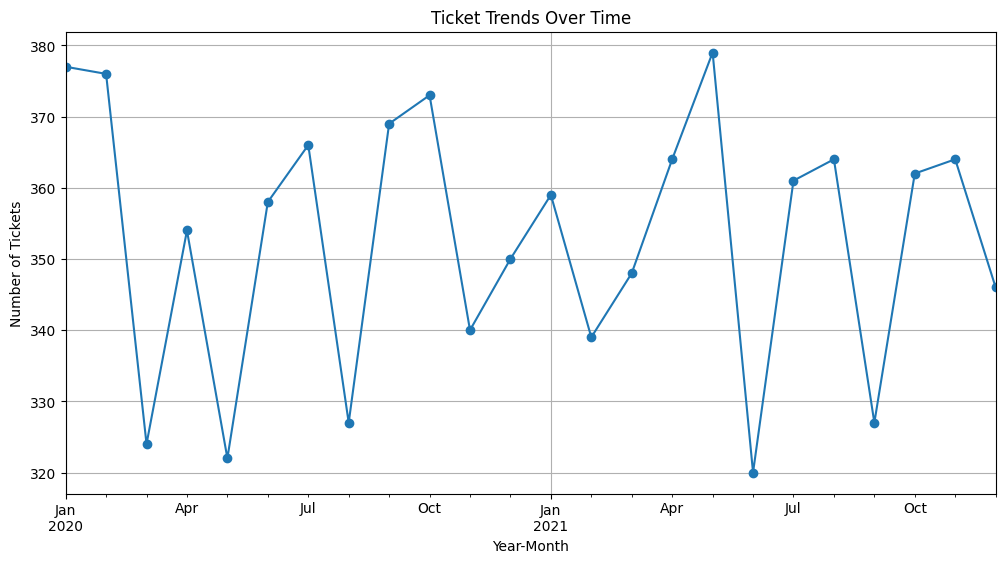

In [12]:
plt.figure(figsize=(12, 6))
ticket_trends.plot(kind='line',marker='o')
plt.title('Ticket Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Tickets')
plt.grid(True)
plt.show()

In [13]:
common_issue=data['Ticket Subject'].value_counts().head(10)
print("Top 10 common issues")
print(common_issue)

Top 10 common issues
Ticket Subject
Refund request           576
Software bug             574
Product compatibility    567
Delivery problem         561
Hardware issue           547
Battery life             542
Network problem          539
Installation support     530
Product setup            529
Payment issue            526
Name: count, dtype: int64


In [14]:
ticket_type_segmentation=data.groupby('Ticket Type').size()
print("Segmentation based on ticket types:\n")
print(ticket_type_segmentation)

Segmentation based on ticket types:

Ticket Type
Billing inquiry         1634
Cancellation request    1695
Product inquiry         1641
Refund request          1752
Technical issue         1747
dtype: int64


In [15]:
Satisfaction_segment=data.groupby('Customer Satisfaction Rating').size()
print("Segmentation based on Customer Satistfaction :\n")
print(Satisfaction_segment)

Segmentation based on Customer Satistfaction :

Customer Satisfaction Rating
1.0    553
2.0    549
3.0    580
4.0    543
5.0    544
dtype: int64


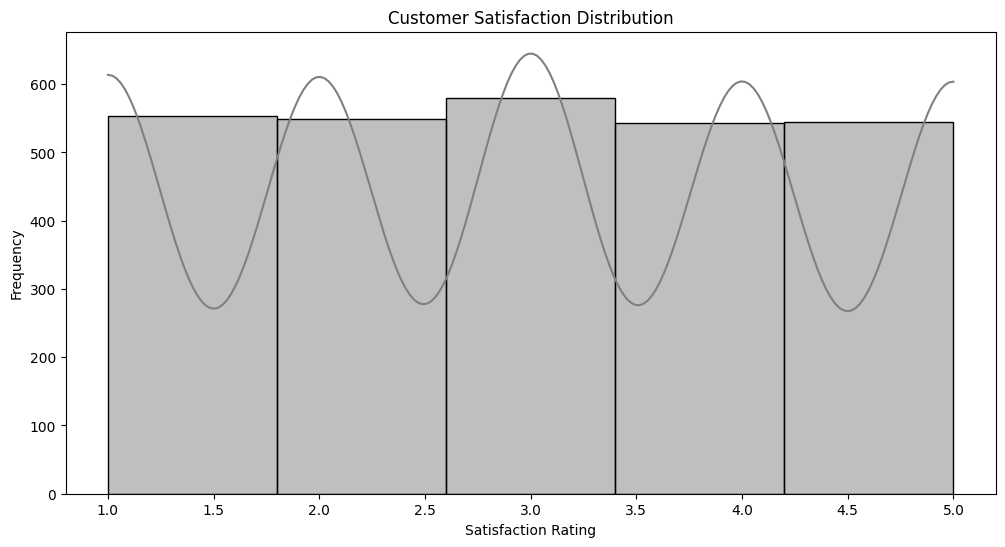

In [16]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Customer Satisfaction Rating'],kde=True,bins=5,color='grey')
plt.title('Customer Satisfaction Distribution')
plt.xlabel('Satisfaction Rating')
plt.ylabel('Frequency')
plt.show()

In [17]:
ticket_status_distribution=data['Ticket Status'].value_counts()
print("Ticket Status Distribution:\n")
print(ticket_status_distribution)

Ticket Status Distribution:

Ticket Status
Pending Customer Response    2881
Open                         2819
Closed                       2769
Name: count, dtype: int64


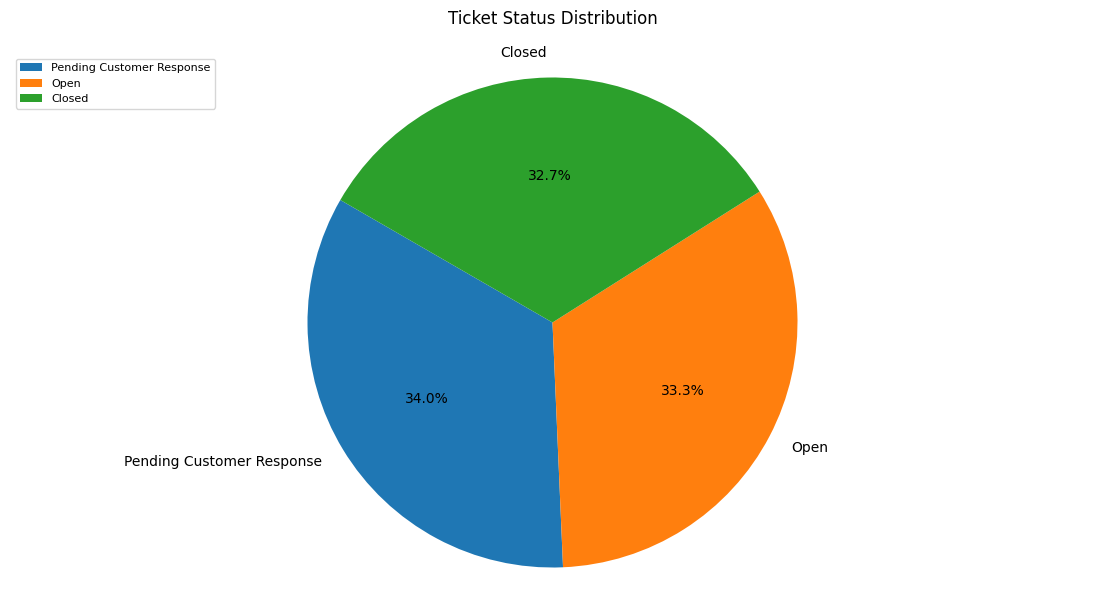

In [18]:
plt.figure(figsize=(14,7))
plt.pie(ticket_status_distribution,labels=ticket_status_distribution.index,autopct='%1.1f%%',startangle=150)
plt.title('Ticket Status Distribution\n')
plt.legend(loc='upper left',fontsize=8)
plt.axis('equal')
plt.show()

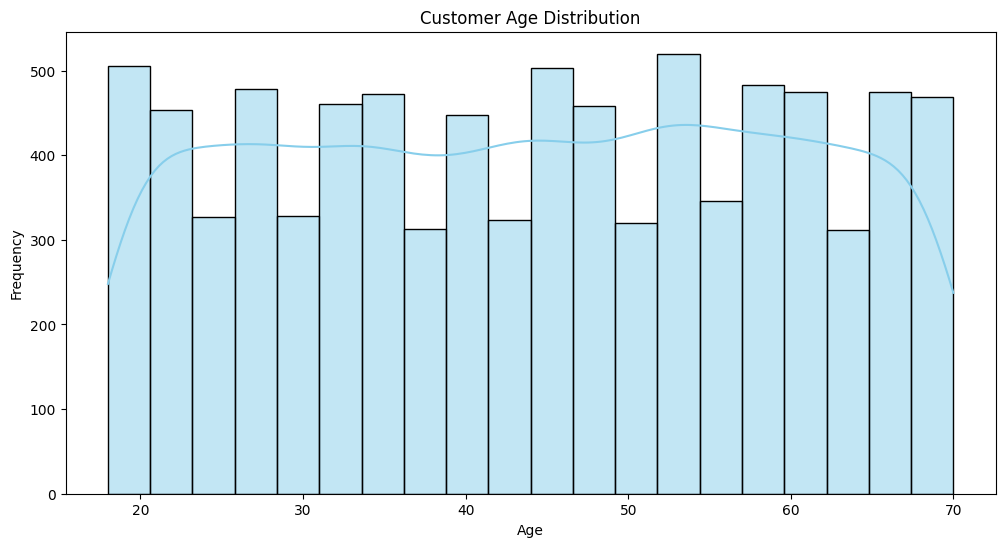

In [19]:
plt.figure(figsize=(12,6))
sns.histplot(data['Customer Age'],kde=True,bins=20,color='skyblue')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [21]:
customer_gender_distribution=data['Customer Gender'].value_counts()
print(customer_gender_distribution)

Customer Gender
Male      2896
Female    2887
Other     2686
Name: count, dtype: int64


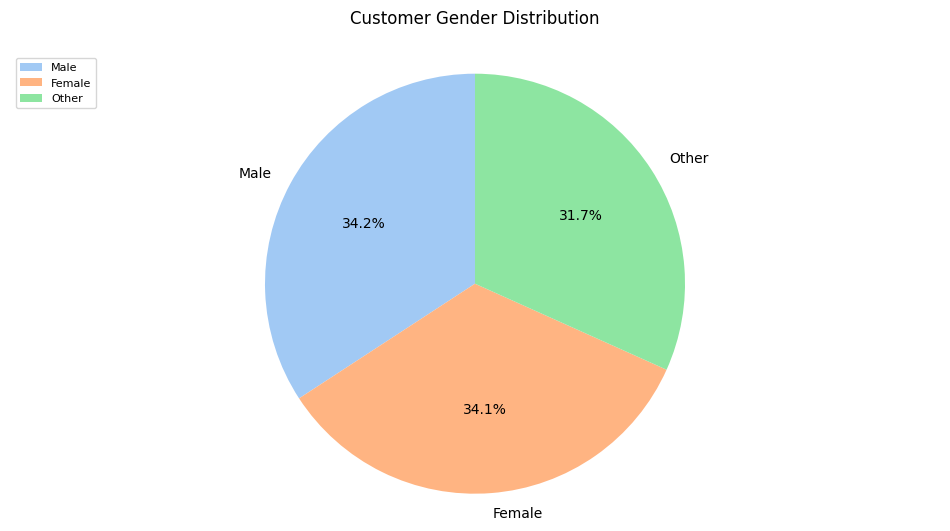

In [22]:
plt.figure(figsize=(12,6))
plt.pie(customer_gender_distribution,labels=customer_gender_distribution.index,autopct='%1.1f%%',colors=sns.color_palette('pastel'),startangle=90)
plt.title('Customer Gender Distribution\n')
plt.legend(loc='upper left',fontsize=8)
plt.axis('equal')
plt.show()


Ticket Channel
Email           2143
Phone           2132
Social media    2121
Chat            2073
Name: count, dtype: int64


<ipython-input-23-512e83bda5a9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ticket_channel_distribution.index,y=ticket_channel_distribution,palette='rocket')


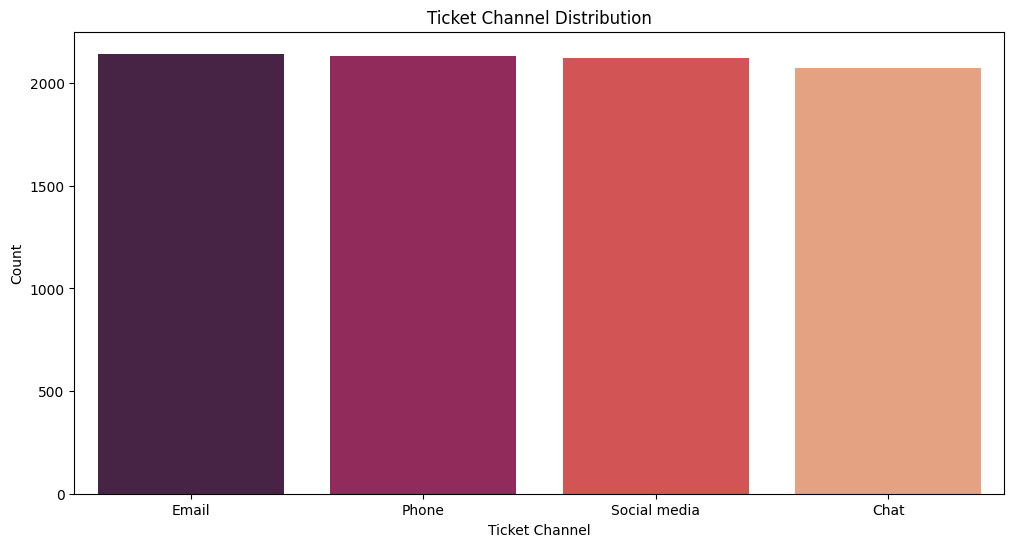

In [23]:
ticket_channel_distribution=data['Ticket Channel'].value_counts()
print(ticket_channel_distribution)
plt.figure(figsize=(12,6))
sns.barplot(x=ticket_channel_distribution.index,y=ticket_channel_distribution,palette='rocket')
plt.title('Ticket Channel Distribution')
plt.xlabel('Ticket Channel')
plt.ylabel('Count')
plt.show()


In [25]:
average_satisfaction = data.groupby('Customer Gender')['Customer Satisfaction Rating'].mean().reset_index()
print(average_satisfaction)

  Customer Gender  Customer Satisfaction Rating
0          Female                      2.971545
1            Male                      3.028384
2           Other                      2.974684


<ipython-input-28-7fd37f063d5b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer Gender',y='Customer Satisfaction Rating',data=average_satisfaction,palette='muted')


Text(0, 0.5, 'Average Satisfaction Rating')

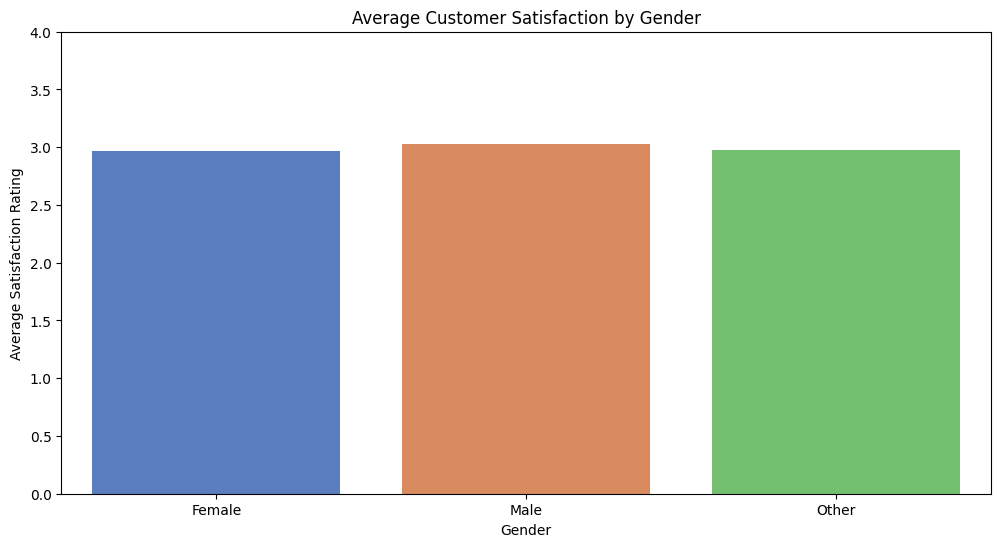

In [28]:
plt.figure(figsize=(12,6))
sns.barplot(x='Customer Gender',y='Customer Satisfaction Rating',data=average_satisfaction,palette='muted')
plt.title('Average Customer Satisfaction by Gender')
plt.xlabel('Gender')
plt.ylim(0,4)
plt.ylabel('Average Satisfaction Rating')

In [31]:
product_purchase_distribution=data['Product Purchased'].value_counts().head(10)
print(product_purchase_distribution)

Product Purchased
Canon EOS              240
GoPro Hero             228
Nest Thermostat        225
Philips Hue Lights     221
Amazon Echo            221
LG Smart TV            219
Sony Xperia            217
Roomba Robot Vacuum    216
Apple AirPods          213
LG OLED                213
Name: count, dtype: int64


<ipython-input-34-cc7f088397e8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=product_purchase_distribution.index,x=product_purchase_distribution,palette='magma')


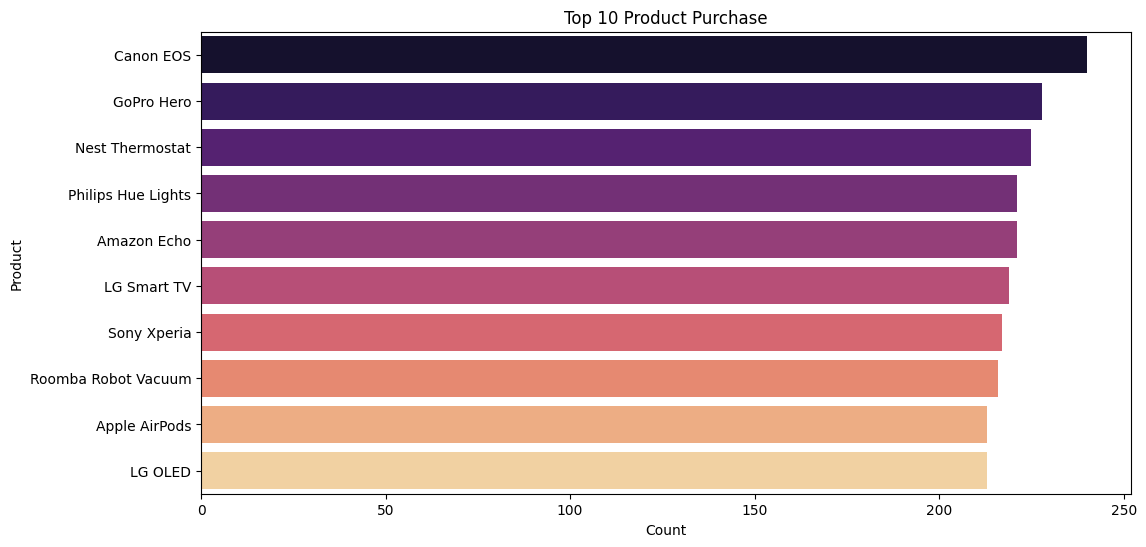

In [34]:
plt.figure(figsize=(12,6))
sns.barplot(y=product_purchase_distribution.index,x=product_purchase_distribution,palette='magma')
plt.title('Top 10 Product Purchase')
plt.xlabel('Count')
plt.ylabel('Product')
plt.show()

In [37]:
top_items_male=data[data['Customer Gender']=='Male']['Product Purchased'].value_counts().head(5)
print(top_items_male)

Product Purchased
GoPro Hero            82
Google Nest           82
Google Pixel          81
Sony Xperia           80
Philips Hue Lights    78
Name: count, dtype: int64


In [41]:
top_items_female=data[data['Customer Gender']=='Female']['Product Purchased'].value_counts().head(5)
print(top_items_female)

Product Purchased
Dyson Vacuum Cleaner    80
Canon EOS               79
Amazon Echo             79
GoPro Hero              79
Canon DSLR Camera       78
Name: count, dtype: int64


In [42]:
top_items_other=data[data['Customer Gender']=='Other']['Product Purchased'].value_counts().head(5)
print(top_items_other)

Product Purchased
Canon EOS              86
Roomba Robot Vacuum    80
LG Smart TV            76
Nest Thermostat        75
Philips Hue Lights     73
Name: count, dtype: int64


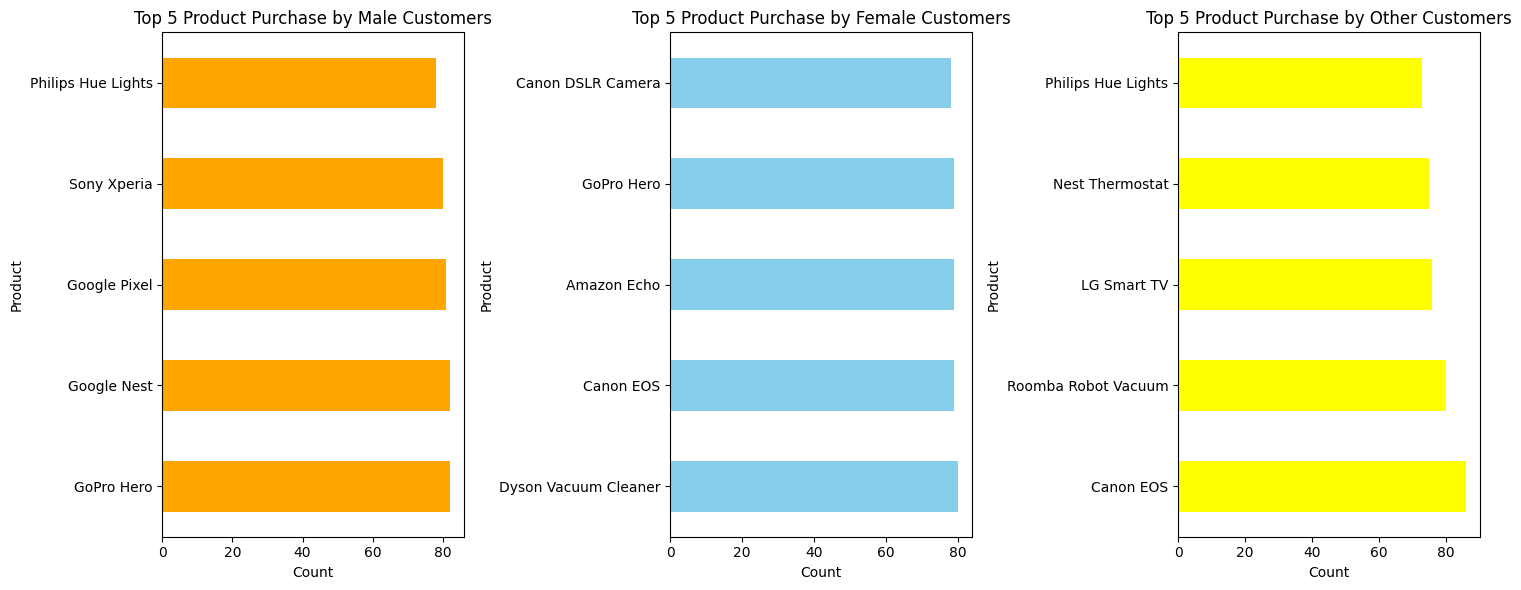

In [44]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
top_items_male.plot(kind='barh',color='orange')
plt.title('Top 5 Product Purchase by Male Customers')
plt.xlabel('Count')
plt.ylabel('Product')

plt.subplot(1,3,2)
top_items_female.plot(kind='barh',color='skyblue')
plt.title('Top 5 Product Purchase by Female Customers')
plt.xlabel('Count')
plt.ylabel('Product')

plt.subplot(1,3,3)
top_items_other.plot(kind='barh',color='yellow')
plt.title('Top 5 Product Purchase by Other Customers')
plt.xlabel('Count')
plt.ylabel('Product')

plt.tight_layout()
plt.show()

In [45]:
ticket_type_distribution=data['Ticket Type'].value_counts()
print(ticket_type_distribution)

Ticket Type
Refund request          1752
Technical issue         1747
Cancellation request    1695
Product inquiry         1641
Billing inquiry         1634
Name: count, dtype: int64


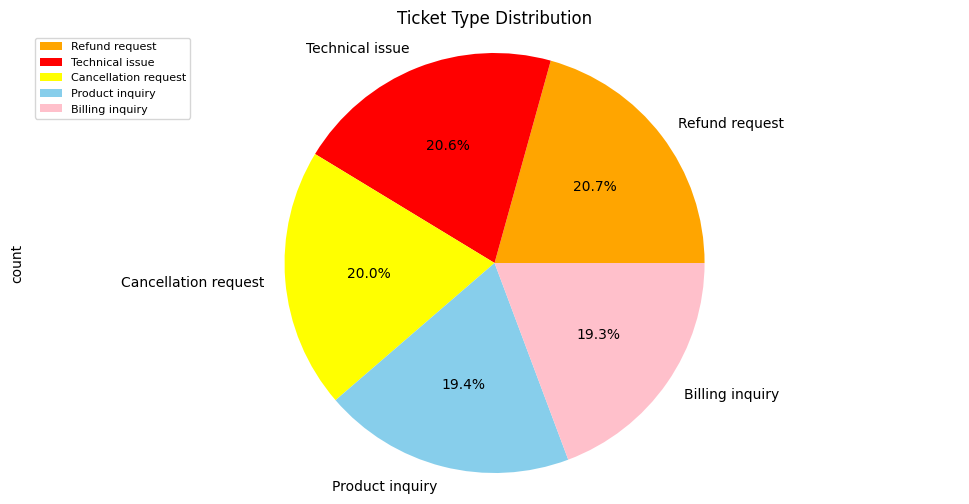

In [48]:
plt.figure(figsize=(12,6))
ticket_type_distribution.plot(kind='pie',autopct='%1.1f%%',colors=['orange','red','yellow','skyblue','pink']),
plt.title('Ticket Type Distribution')
plt.legend(loc='upper left',fontsize=8)
plt.axis('equal')
plt.show()


In [49]:
ticket_priority_distribution=data['Ticket Priority'].value_counts()
print(ticket_priority_distribution)

Ticket Priority
Medium      2192
Critical    2129
High        2085
Low         2063
Name: count, dtype: int64


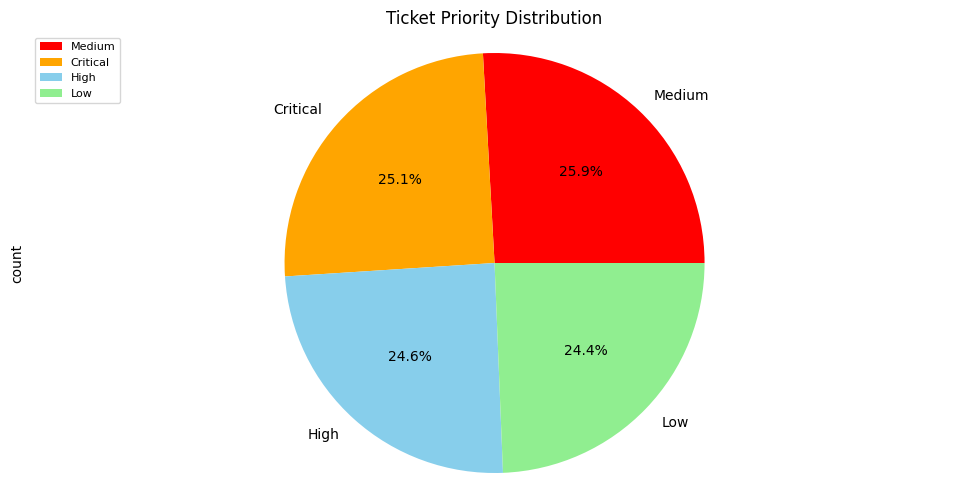

In [50]:
plt.figure(figsize=(12,6))
ticket_priority_distribution.plot(kind='pie',autopct='%1.1f%%',colors=['red','orange','skyblue','lightgreen'])
plt.title('Ticket Priority Distribution')
plt.legend(loc='upper left',fontsize=8)
plt.axis('equal')
plt.show()

In [54]:
bin=[0,20,30,40,50,60,70,80,90,100]
label=['0-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']
data['Age Group']=pd.cut(data['Customer Age'],bins=bin,labels=label,right=False)

In [55]:
ticket_by_age_group=data.groupby('Age Group').size()
print(ticket_by_age_group)

Age Group
0-20       332
21-30     1596
31-40     1556
41-50     1585
51-60     1669
61-70     1575
71-80      156
81-90        0
91-100       0
dtype: int64


<ipython-input-55-9c5d7d16b0c1>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ticket_by_age_group=data.groupby('Age Group').size()


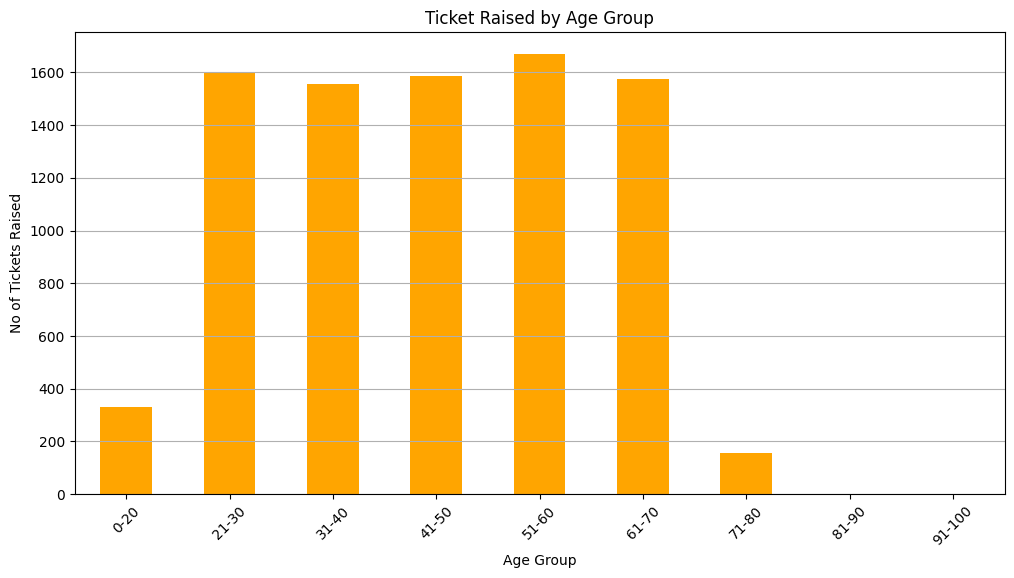

In [67]:
plt.figure(figsize=(12,6))
ticket_by_age_group.plot(kind='bar',color='orange')
plt.title('Ticket Raised by Age Group')
plt.xlabel('Age Group')
plt.ylabel('No of Tickets Raised')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

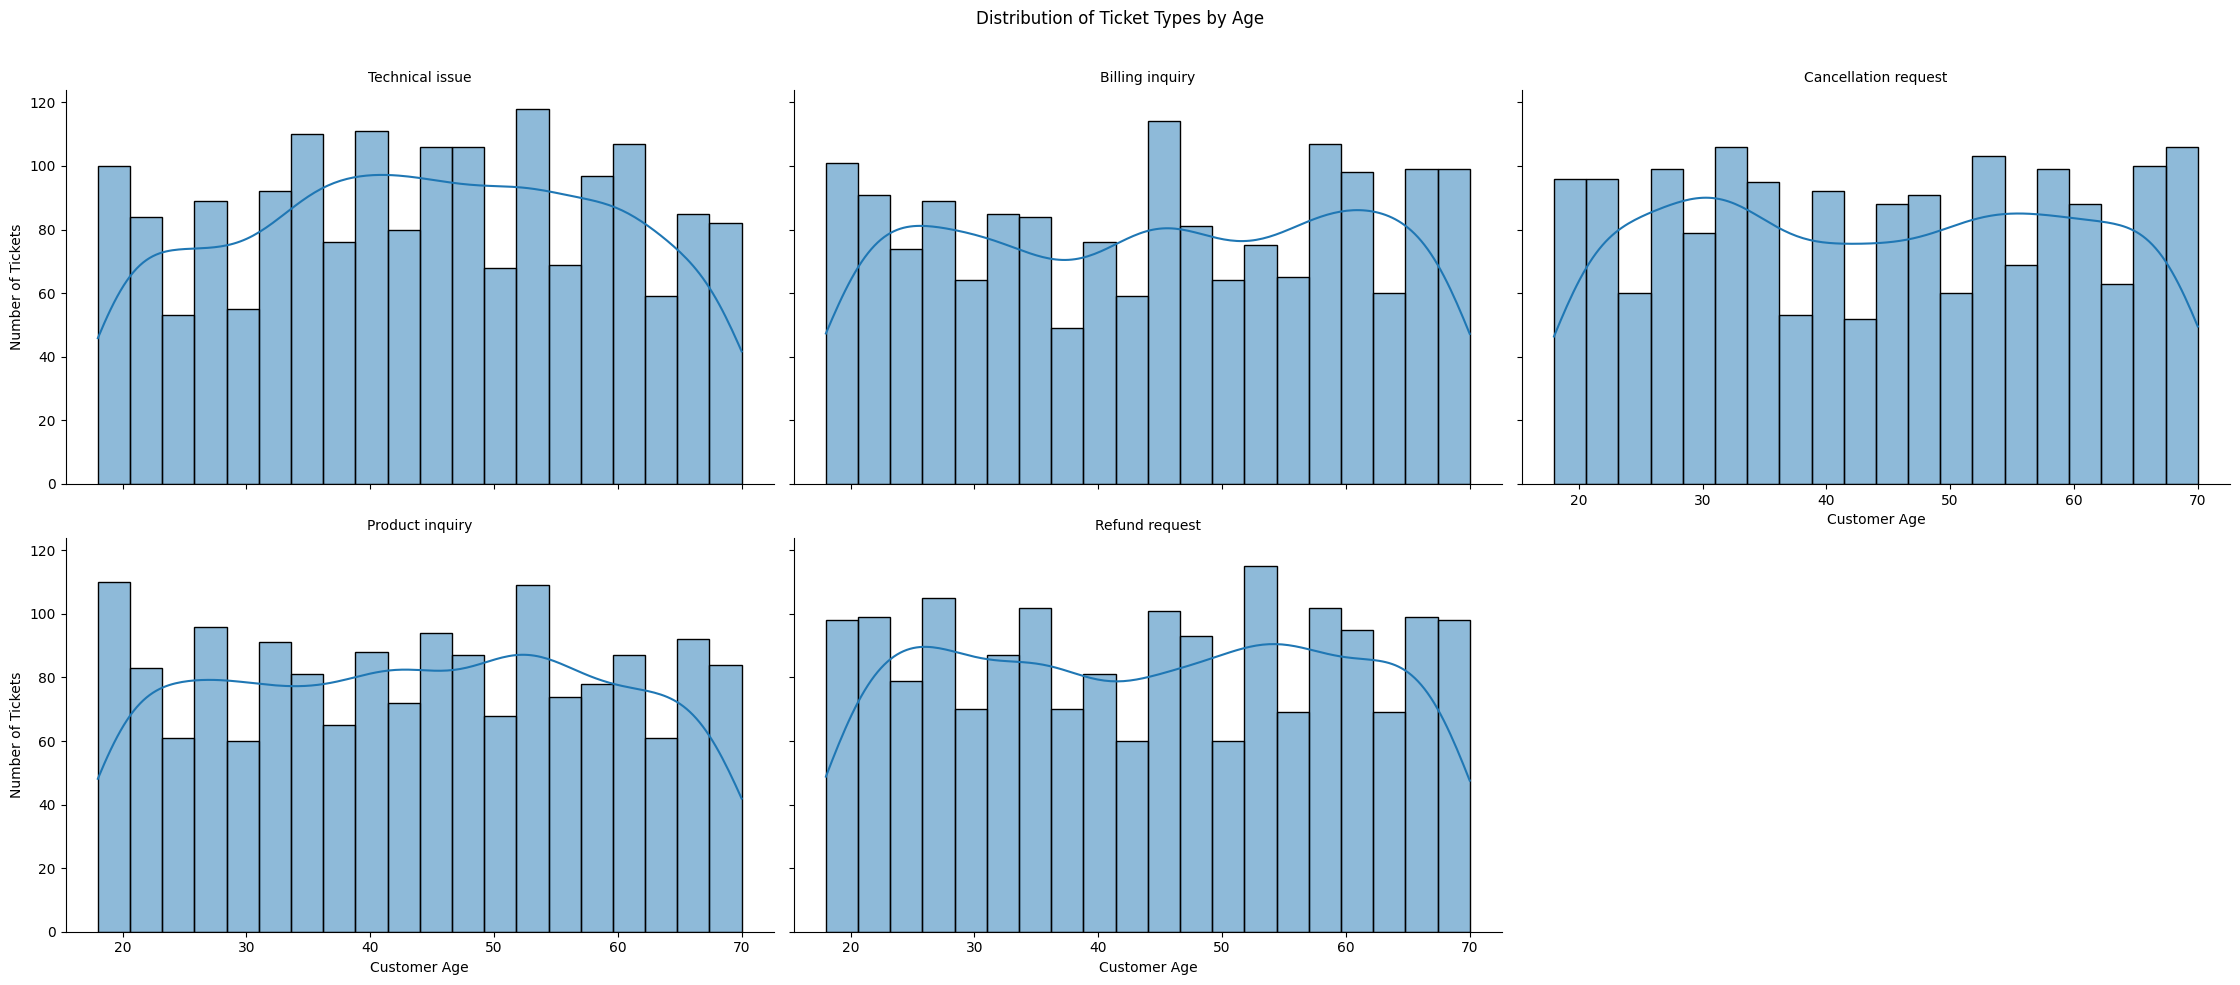

In [74]:
data.replace([np.inf,-np.inf],np.nan,inplace=True)

g=sns.FacetGrid(data, col='Ticket Type',col_wrap=3,height=5,aspect=1.5)
g.map(sns.histplot,'Customer Age',bins=20,kde=True)
g.set_titles('{col_name}')
g.set_axis_labels('Customer Age','Number of Tickets')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Ticket Types by Age')
plt.show()
